<a href="https://colab.research.google.com/github/ixxxxuxo/project_01/blob/main/AI_01_%EB%B0%95%EC%83%81%ED%9A%A8_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/vgames2.csv')
df.info()
# 결측치 확인
print(df.isnull().sum())
df.describe()
# 필요없는 열 삭제
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB
Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [7]:
# 결측치 제거 
df = df.dropna()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [8]:
#판매량에서 M은 지우고, K는 0.001을 곱하기
#문자열 지우고 변환해야함
def filter_str(x):
  if "K" in x:
    index = x.index("K")
    x = x[:index]
    x = float(x)
    x = x * 0.001
  elif "M" in x:
    index = x.index("M")
    x = x[:index]
    x = float(x)
  else:
    x = float(x)
  return x

In [9]:
df['NA_Sales'] = df['NA_Sales'].map(filter_str)
df['EU_Sales'] = df['EU_Sales'].map(filter_str)
df['JP_Sales'] = df['JP_Sales'].map(filter_str)
df['Other_Sales'] = df['Other_Sales'].map(filter_str)

In [10]:
df['NA_Sales'].head()
# print('북미판매량',df['NA_Sales'].unique(),'\n')
# print('유럽판매량',df['EU_Sales'].unique(),'\n')
# print('일본판매량',df['JP_Sales'].unique(),'\n')
# print('기타판매량',df['Other_Sales'].unique(),'\n')

0    0.04
1    0.17
2    0.00
3    0.04
4    0.12
Name: NA_Sales, dtype: float64

In [11]:
total_sales = pd.DataFrame(data=df,columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year'])
# print(total_sales['Year'])
total_sales = total_sales.sort_values(by=['Year'],ascending=True)
# unique = total_sales['Year'].value_counts()
total_sales['Year']


9276        0.0
16394       0.0
14666       0.0
2249        1.0
8681        1.0
          ...  
1786     2016.0
10107    2017.0
5310     2017.0
15233    2017.0
6906     2020.0
Name: Year, Length: 16241, dtype: float64

In [12]:
new_year = total_sales['Year'] > 1995.0
year_sort = df[new_year].sort_values(by=['Year'],ascending=True)
year_sort

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16597,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0.00,0.00,0.16,0.01
8201,The Incredible Hulk: The Pantheon Saga,PS,1996.0,Action,Eidos Interactive,0.09,0.06,0.00,0.01
10418,Jikkyou Powerful Pro Yakyuu '96 Kaimakuban,SNES,1996.0,Sports,Konami Digital Entertainment,0.00,0.00,0.19,0.00
14319,Star Wars: Shadows of the Empire,N64,1996.0,Action,Nintendo,2.00,0.50,0.12,0.03
4168,Pro Pinball,PS,1996.0,Misc,Empire Interactive,0.23,0.15,0.00,0.03
...,...,...,...,...,...,...,...,...,...
5402,Valentino Rossi: The Game,PC,2016.0,Racing,Namco Bandai Games,0.00,0.01,0.00,0.00
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00


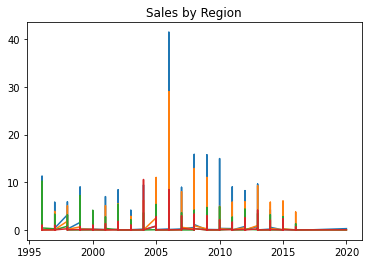

In [13]:
plt.plot(year_sort['Year'],year_sort['NA_Sales']);
plt.plot(year_sort['Year'],year_sort['EU_Sales']);
plt.plot(year_sort['Year'],year_sort['JP_Sales']);
plt.plot(year_sort['Year'],year_sort['Other_Sales']);
plt.title('Sales by Region')
plt.show();

In [14]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


**Q1.지역에 따라서 선호하는 게임 장르가 다를까**
- 장르 / 지역별 게임 판매량
- 비교
- 가설
1) 귀무가설 : 지역에 따라서 선호하는 게임이 다를것이다
2) 대안가설 : 지역에 따라서 선호하는 게임이 다르지 않을것이다


In [16]:
import seaborn as sns

# df.info()
df['Name'] = df['Name'].astype('category')
x = df['Name'].value_counts()

df['Platform'] = df['Platform'].astype('category')
y = df['Platform'].value_counts()
# Total_Sales_Value = df.sum(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)

# Top_Sales_Game= df[Total_Sales_Value].groupby(df['Name'])
# print(Top_Sales_Game)





In [15]:
df.corr()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,1.000000,-0.004167,-0.001411,-0.019807,0.000757
NA_Sales,-0.004167,1.000000,0.768906,0.449358,0.634707
EU_Sales,-0.001411,0.768906,1.000000,0.432350,0.728084
JP_Sales,-0.019807,0.449358,0.432350,1.000000,0.285395
Other_Sales,0.000757,0.634707,0.728084,0.285395,1.000000


**Q2. 연도별 게임의 트렌드가 있을까**
- 장르+판매량 추이 / 연도 -> 시계열 그래프 시각화

**Q3. 매출이 높은 게임에 대한 분석 및 시각화 프로세스**
- 매출 상위 장르
- 매출 상위 장르의 지역 판매량
- 귀무가설 : 매출이 높은 게임은 지역과 관계가 있을것이다
- 대안가설 : 매출이 높은 게임은 지역과 관계가 없을것이다

- 특정 장르가 매출이 높은가?